In [1]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline  
# %matplotlib notebook
# %pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

### Ax: considering each column in A, aka finding significant signal senders
(Rows are normalized, each row sum to 1)

In [2]:
data = np.load('adaptive_adj_noSC.npy')
data = data.sum(1)
data.shape

(1744, 200)

In [3]:
data

array([[0.65313995, 0.58738863, 0.48111263, ..., 0.8595321 , 0.6921927 ,
        1.0368347 ],
       [3.4664958 , 1.934022  , 2.691807  , ..., 0.6713009 , 0.86426276,
        0.81048834],
       [0.5071739 , 0.703317  , 0.46073583, ..., 4.356682  , 1.4996338 ,
        0.55381995],
       ...,
       [1.3168321 , 0.853283  , 1.5123199 , ..., 1.6937021 , 1.269306  ,
        0.9019748 ],
       [1.1844364 , 0.881467  , 0.7288314 , ..., 0.72244895, 1.2118987 ,
        0.95282376],
       [0.6711713 , 0.93667054, 2.816232  , ..., 0.705847  , 0.904939  ,
        0.76154935]], dtype=float32)

Explained variation per principal component: [0.04518563 0.04292784 0.02841837 0.02443591 0.0224382  0.0218542
 0.01954363 0.01885887 0.01768078 0.01594767 0.0150791  0.01389474
 0.01368597 0.01321816 0.01299323]
Total explanability: 0.32616234


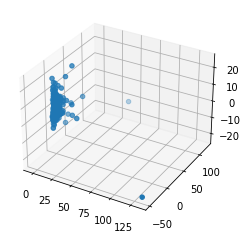

In [4]:
pca = PCA(n_components=15)
pca_result = pca.fit_transform(data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explanability:', pca.explained_variance_ratio_.sum())

ax = plt.figure().gca(projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1744 samples in 0.135s...
[t-SNE] Computed neighbors for 1744 samples in 0.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1744
[t-SNE] Computed conditional probabilities for sample 1744 / 1744
[t-SNE] Mean sigma: 2.907632
[t-SNE] KL divergence after 250 iterations with early exaggeration: 107.095192
[t-SNE] KL divergence after 300 iterations: 3.462975
t-SNE done! Time elapsed: 3.60758638381958 seconds


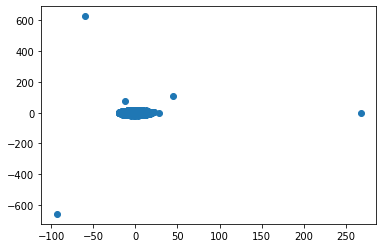

In [5]:
# tsne from data
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1744 samples in 0.005s...
[t-SNE] Computed neighbors for 1744 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1744
[t-SNE] Computed conditional probabilities for sample 1744 / 1744
[t-SNE] Mean sigma: 1.509514
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.634468
[t-SNE] KL divergence after 300 iterations: 1.890346
t-SNE done! Time elapsed: 2.648744583129883 seconds


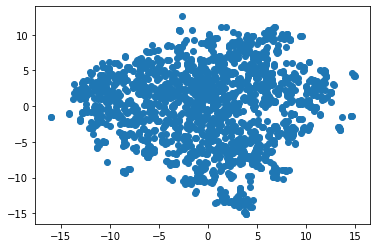

In [6]:
# tsne from pca results
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()

In [7]:
# population mean
mean_data = data.sum(0)

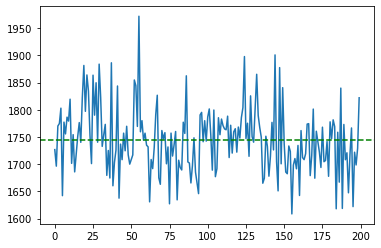

In [8]:
plt.plot(mean_data)
plt.axhline(y=mean_data.mean(), color='g', linestyle='--')

In [9]:
(np.asarray(np.where(mean_data > mean_data.mean()))+1).squeeze()

array([  3,   4,   5,   7,   8,   9,  10,  11,  13,  16,  17,  19,  20,
        21,  22,  23,  24,  26,  27,  28,  30,  31,  33,  34,  38,  42,
        46,  48,  53,  54,  55,  56,  57,  58,  59,  60,  67,  68,  71,
        72,  73,  77,  80,  85,  86,  87,  92,  96,  97,  99, 101, 102,
       103, 105, 108, 109, 110, 111, 112, 113, 114, 116, 118, 119, 121,
       122, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136,
       139, 143, 145, 148, 150, 162, 166, 167, 170, 172, 176, 181, 182,
       183, 184, 186, 188, 190, 195, 200])

https://github.com/ThomasYeoLab/CBIG/blob/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_200Parcels_17Networks_order.txt

**check: 13-50, 113-156** (additional: 75-89, 175-200)

**SomMot(somatomotor), DorsAttn(dorsal attention), SalVentAttn(salience/ventral attention)**
(13-50 LH and 113-156 RH)

DMN: 75-98, 184-196


"Also, to see if the revealed channel-wise topology resembled the intrinsic network organization of the brain, we sorted the 62 channels into 6 groups to represent the activity of previously established resting-state networks41 (RSNs). These included the visual (VN), somatomotor (SM), dorsal attention (DA), ventral attention and limbic (VAL), frontoparietal (FP) and default mode (DMN) networks." from https://www.nature.com/articles/s41598-019-49726-5

Other resources regarding resting state networks:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3174820/ (7/17 networks --- Actually Schaefer2018 parcellation is based on this!)

<IPython.core.display.Javascript object>


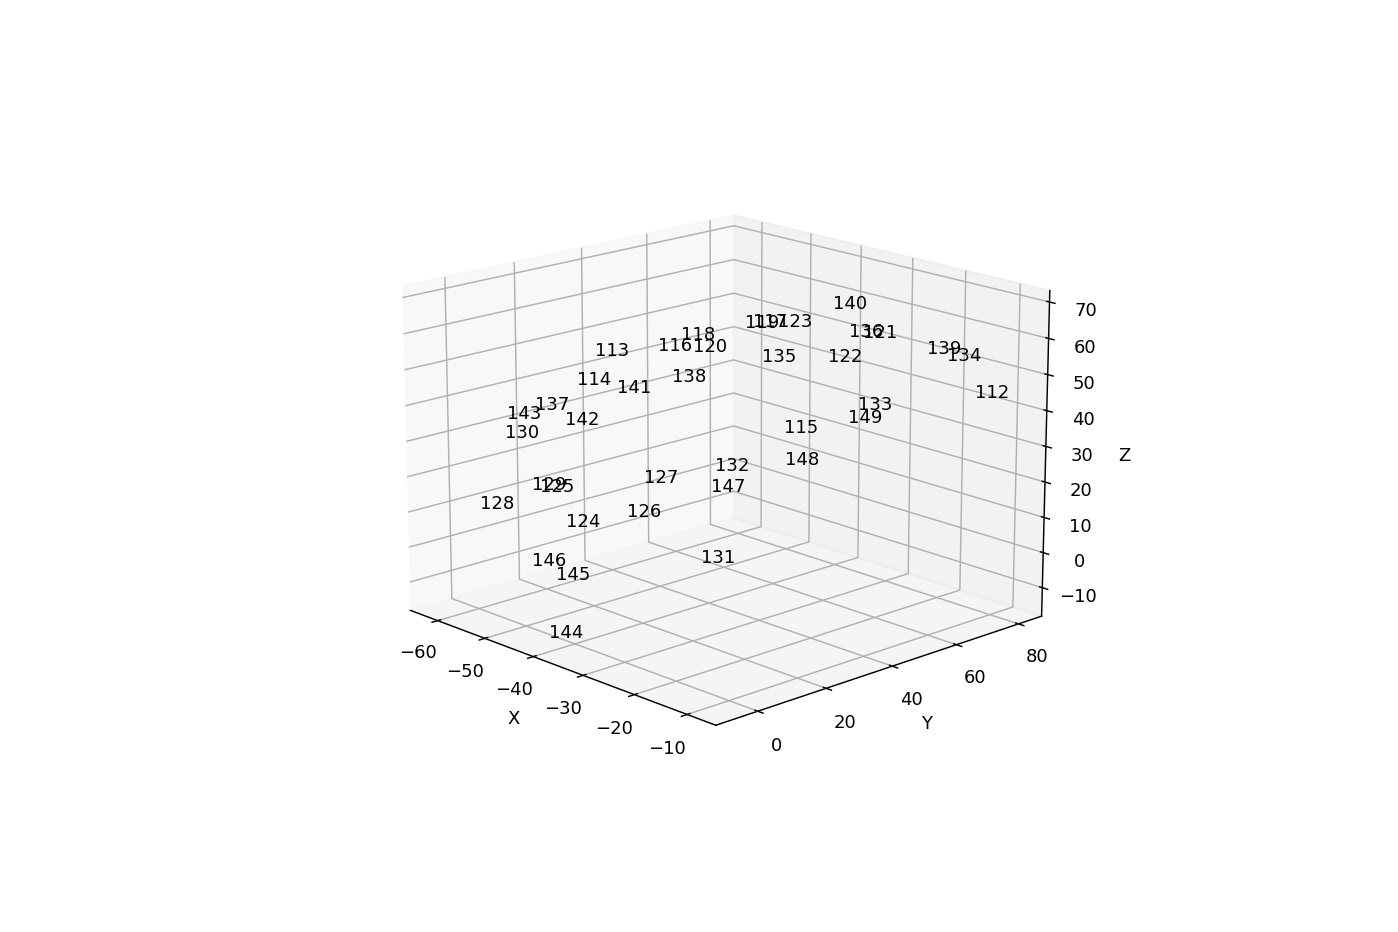

In [26]:
coor_mri = np.loadtxt('/host/data/MRI_EEG/utils/eeg_coor_conv/Schaefer2018_200Parcels_17Networks_order_FSLMNI152_2mm.txt', usecols=(3,4,5,6))

coor_mean = []

for i in range(112,150):
    cur_coor = list(coor_mri[coor_mri[:,-1] == i][:,:3].mean(0))
    cur_coor.append(i)
    coor_mean.append(cur_coor)

coor_mean = np.stack(coor_mean).astype(np.float16)

'''plot region number in 3d space'''
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(len(coor_mean)):
    ax.text(coor_mean[i,0], coor_mean[i,1], coor_mean[i,2], str(int(coor_mean[i,3])))

ax.set_xlim(coor_mean[:,0].min()-1, coor_mean[:,0].max()+1)
ax.set_ylim(coor_mean[:,1].min()-1, coor_mean[:,1].max()+1)
ax.set_zlim(coor_mean[:,2].min()-1, coor_mean[:,2].max()+1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()